In [102]:
import matplotlib.pyplot as plt
import math

In [1]:
t_i = [[0,0,0,0],[0,1,1],[0,1],[0,0,1],[1,1,1],[1]]

In [32]:
def lista_de_cortes():
    datos = []
    for i in range(len(t_i) + 1):
        t_i_izq = t_i[:i]
        t_i_der = t_i[i:]
        
        cant_neg_real = sum(sublista.count(0) for sublista in t_i_izq)
        cant_pos_real = sum(sublista.count(1) for sublista in t_i_der)
        
        cant_neg_cal = sum(len(sublista) for sublista in t_i_izq)
        cant_pos_cal = sum(len(sublista) for sublista in t_i_der)
        
        dato = {
        "izquierda": t_i_izq,
        "derecha": t_i_der,
        "pos_real": cant_pos_real,
        "neg_real": cant_neg_real,
        "pos_cal": cant_pos_cal,
        "neg_cal": cant_neg_cal
    }
        
        datos.append(dato)
    return datos
        

In [70]:
def calculos_verdadero_positivo(lista):
    calculos = []
    for dato in lista:
        if(dato['pos_cal'] == dato['pos_real']):
            clasif_pos = dato['pos_real']
        else:
            clasif_pos = dato['pos_cal'] - dato['pos_real']
        
        if(dato['pos_real'] == 0):
            TP = 0
        else:
            TP = clasif_pos / dato['pos_real']
        calculos.append(TP)
    return calculos

def calculos_falso_positivo(lista):
    calculos = []
    for dato in lista:
        cant_pos_izq = sum(sublista.count(1) for sublista in dato['izquierda'])
        if(dato['neg_real'] == 0):
            FP = 0
        else:
            FP = cant_pos_izq / dato['neg_real']
        calculos.append(FP)
    return calculos

In [76]:
def grafico_de_puntos(tpr, fpr):
    plt.plot(fpr, tpr, 'bo')

    # Etiquetas y título
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Coordenadas')

    # Mostrar el gráfico
    plt.show()

In [156]:
def calcular_minimo_corte(tpr, fpr):
    ideal_point = (0, 1)

    # Inicializar la distancia mínima y las coordenadas del punto de corte óptimo
    min_distance = float('inf')
    optimal_cutoff = None
    
    # Calcular la distancia euclidiana entre cada par de coordenadas y encontrar el punto de corte óptimo
    for i, (t, f) in enumerate(zip(tpr, fpr)):
        distance = math.sqrt((t - ideal_point[0])**2 + (f - ideal_point[1])**2)
        if distance < min_distance:
            min_distance = distance
            optimal_cutoff = (t,f)
            optimal_cutoff_index = i
    return optimal_cutoff, optimal_cutoff_index

Corte optimo es: (0, 1.0) 
En el intervalo 6


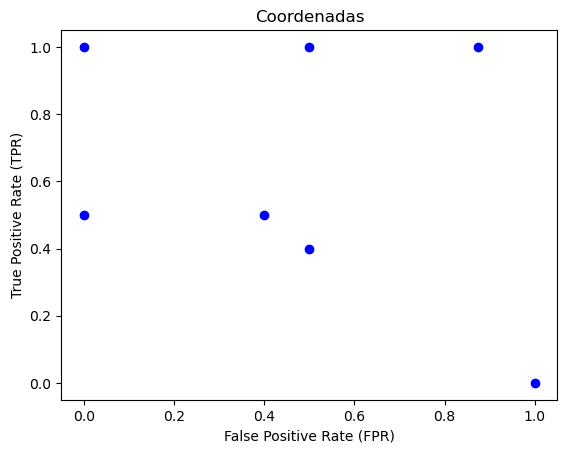

In [161]:
tpr = calculos_verdadero_positivo(lista_de_cortes())
fpr = calculos_falso_positivo(lista_de_cortes())

corte_optimo = calcular_minimo_corte(tpr, fpr)

print("Corte optimo es:",corte_optimo[0],"\nEn el intervalo", corte_optimo[1])

grafico_de_puntos(tpr, fpr)